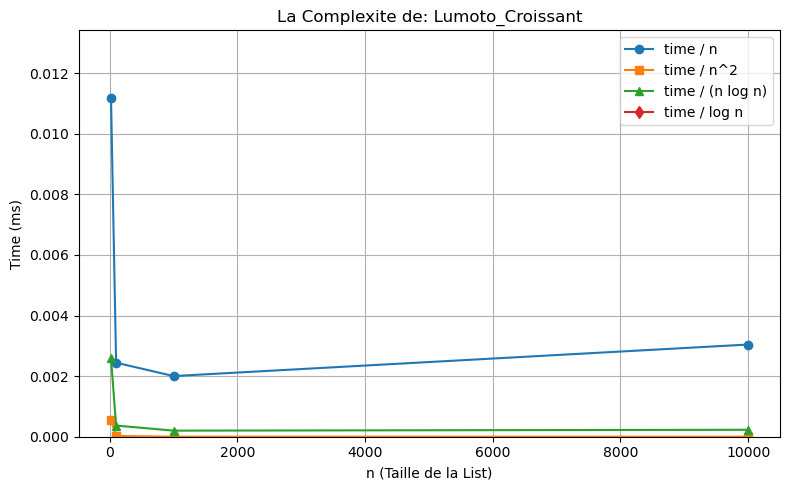

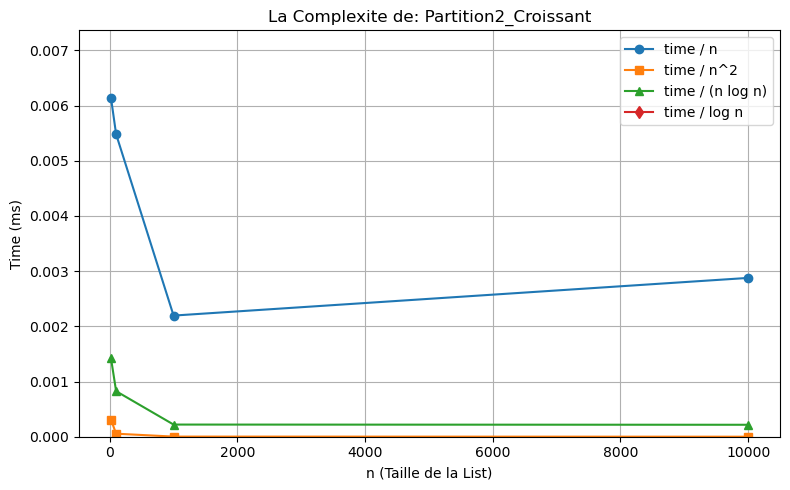

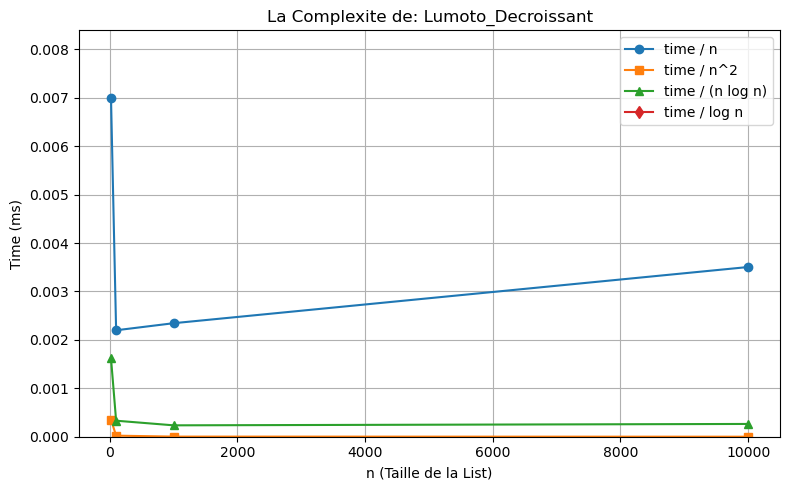

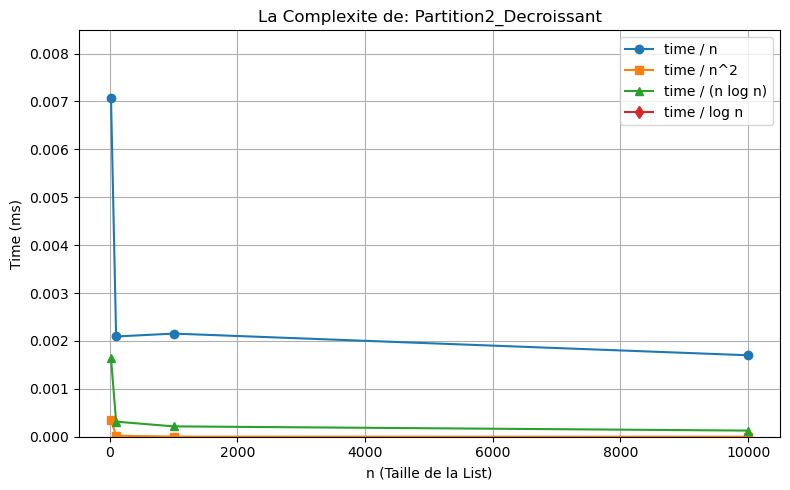

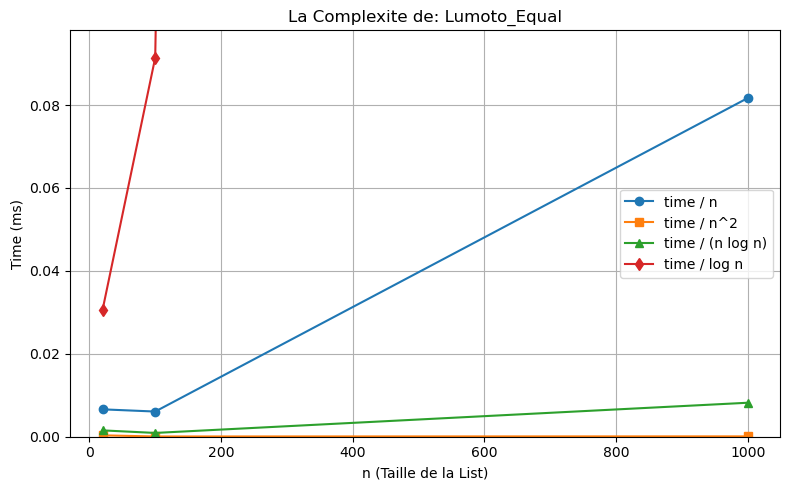

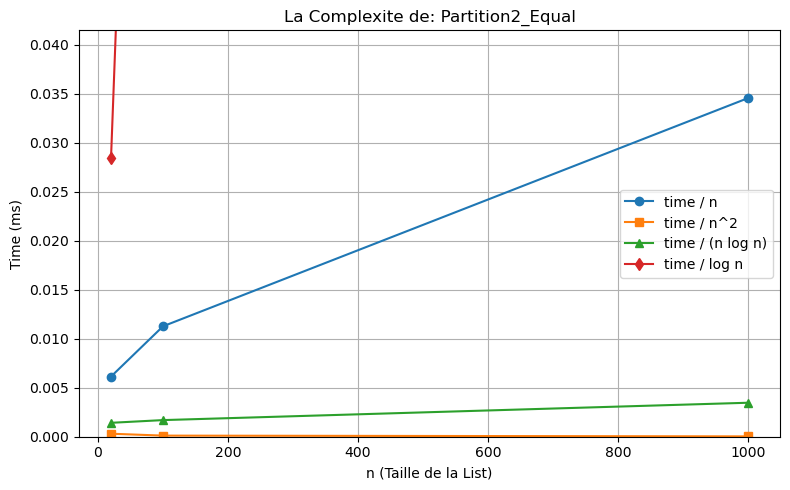

In [3]:
import matplotlib.pyplot as plt
import numpy as np

list_taille = [20, 100, 1000, 10000]

def calcul_time(file_name):
    time_total = count = 0
    list_times = []
    with open(file_name, "r") as file:
        for line in file:
            time_total += float(line.strip())
            count += 1
            if count % 5 == 0:
                list_times.append(time_total / 5)
                time_total = 0
        if count % 5 != 0:
            list_times.append(time_total / (count % 5))
    return list_times


methods = {
    "Lumoto_Croissant": "time(Lumoto_croissant).txt",
    "Partition2_Croissant": "time(Partition2_croissant).txt",
    "Lumoto_Decroissant": "time(Lumoto_decroissant).txt",
    "Partition2_Decroissant": "time(Partition2_decroissant).txt",
    "Lumoto_Equal": "time(Lumoto_equal).txt",
    "Partition2_Equal": "time(Partition2_equal).txt"
}

for method, file_name in methods.items():
    times = calcul_time(file_name)

    min_len = min(len(times), len(list_taille))
    times = times[:min_len]
    n = np.array(list_taille[:min_len])
    t = np.array(times) * 1000  # convert to ms

    t_over_n = t / n
    t_over_n2 = t / (n ** 2)
    t_over_nlogn = t / (n * np.log2(n))
    t_over_logn = t / np.log2(n)

    plt.figure(figsize=(8, 5))
    plt.plot(n, t_over_n, marker='o', label='time / n')
    plt.plot(n, t_over_n2, marker='s', label='time / n^2')
    plt.plot(n, t_over_nlogn, marker='^', label='time / (n log n)')
    plt.plot(n, t_over_logn, marker='d', label='time / log n')

    plt.title(f"La Complexite de: {method}")
    plt.xlabel("n (Taille de la List)")
    plt.ylabel("Time (ms)")
    plt.grid(True)
    plt.legend()

    y_min = 0
    y_max = t_over_n.max() * 1.2
    plt.ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()
